In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

from fastai.vision import *
from fastai import *
import pandas as pd

import tarfile
import scipy.io
import numpy as np
import cv2
import os
import shutil
import random

from torchvision.models import *
from fastai.vision.models import *
from fastai.vision.learner import model_meta

import sys
import pretrainedmodels

In [15]:
path = Path('/home/amccarthy13/Documents/car-damage-dataset')

In [47]:
tfms = get_transforms(do_flip=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.2,
                      xtra_tfms=[brightness(change=(0.5*(1-0.1), 0.5*(1+0.1)), p=0.75),
                                 contrast(scale=(1-0.1, 1/(1-0.1)), p=0.75)])

data1 = ImageDataBunch.from_folder(path/'data2a','training','validation',ds_tfms=tfms, bs=64, size=624).normalize(imagenet_stats)

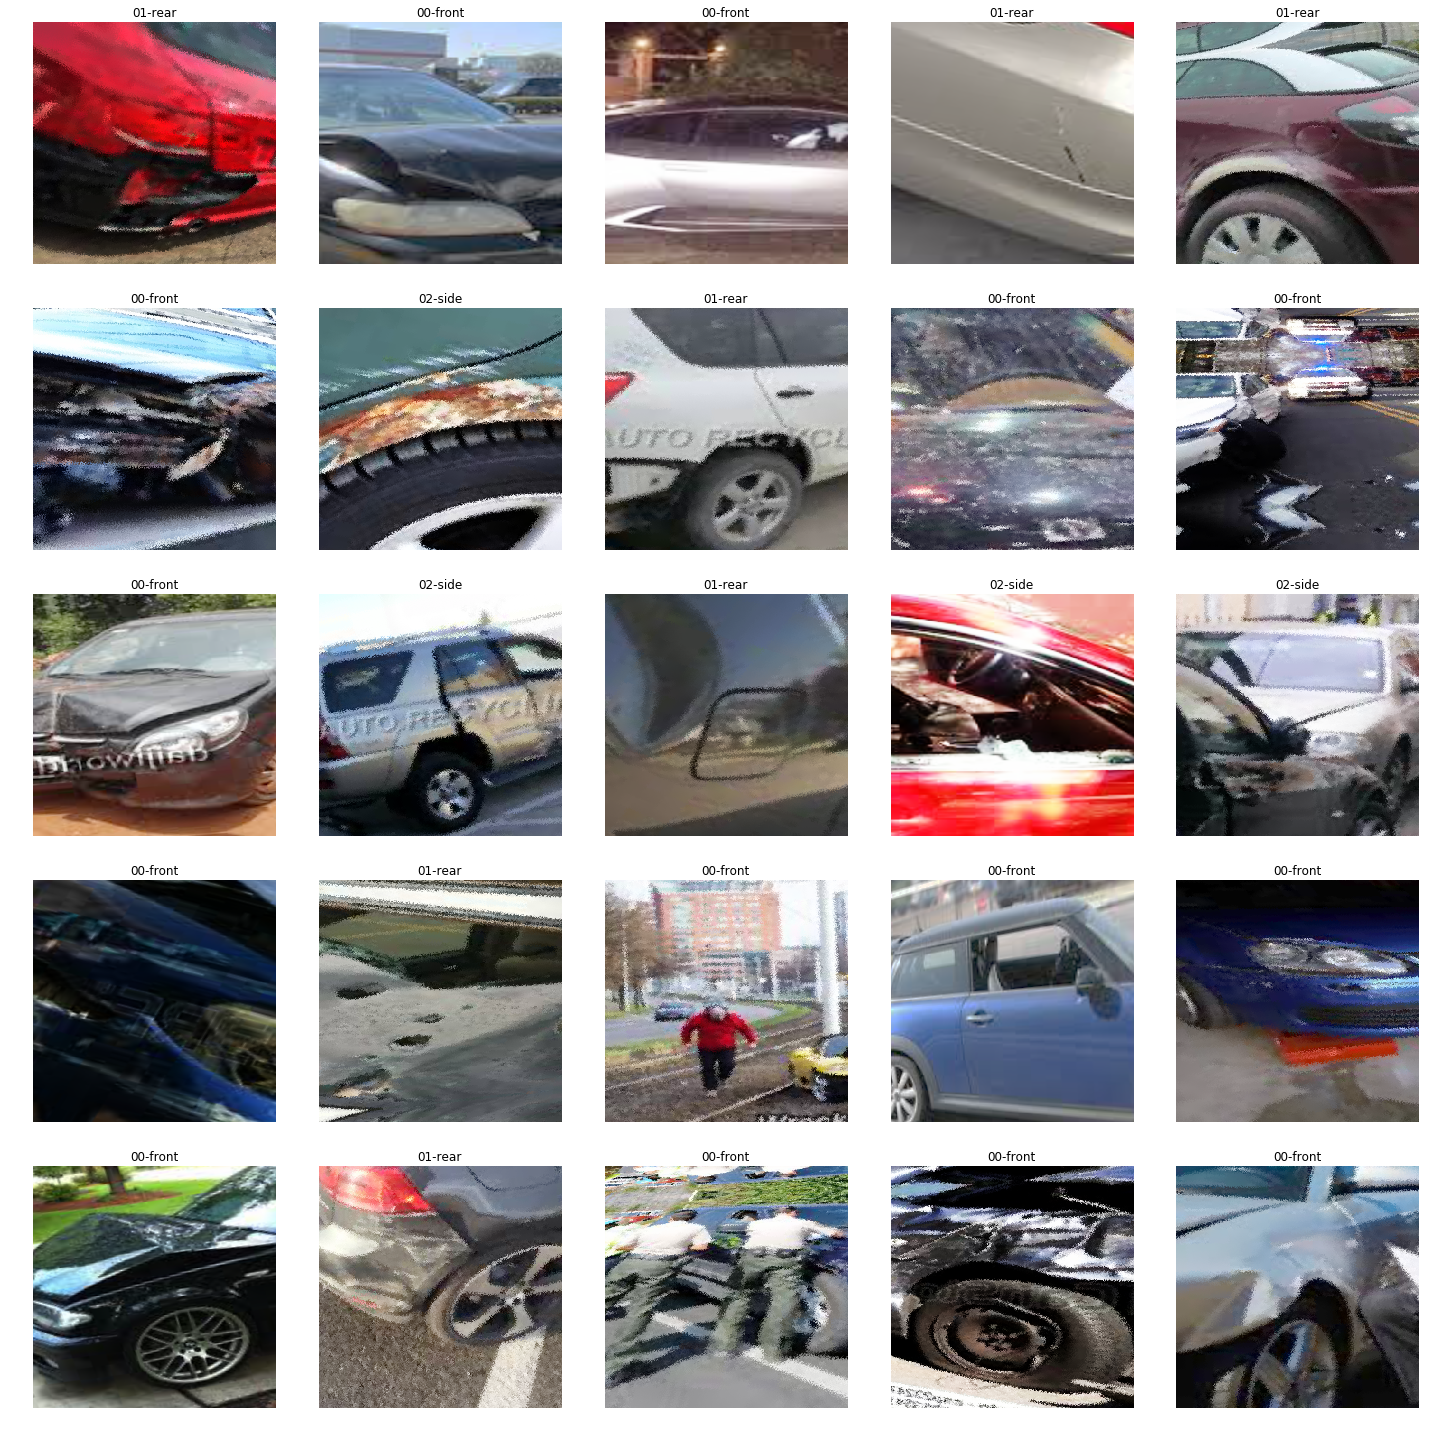

In [20]:
data1.show_batch()

In [15]:
print(len(data_notfms.classes))
print(data_notfms.classes)

3
['00-front', '01-rear', '02-side']


In [48]:
learn1 = create_cnn(data1, models.resnet34, pretrained=True, metrics=[error_rate, accuracy])
learn1.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


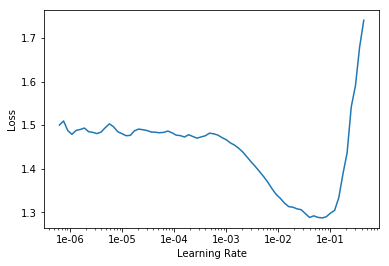

In [49]:
learn1.lr_find()
learn1.recorder.plot()

In [51]:
lr = 4.5e-3
learn1.fit_one_cycle(15, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.732128,0.849003,0.345029,0.654971,00:17
2,0.695981,0.844928,0.356725,0.643275,00:17
3,0.693125,0.881769,0.362573,0.637427,00:16
4,0.681622,0.830419,0.345029,0.654971,00:16
5,0.665509,0.902405,0.374269,0.625731,00:17
6,0.658114,0.836503,0.333333,0.666667,00:17
7,0.638617,0.848702,0.345029,0.654971,00:17
8,0.616367,0.800497,0.327485,0.672515,00:17
9,0.586949,0.842371,0.333333,0.666667,00:17
10,0.557207,0.801888,0.327485,0.672515,00:16


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


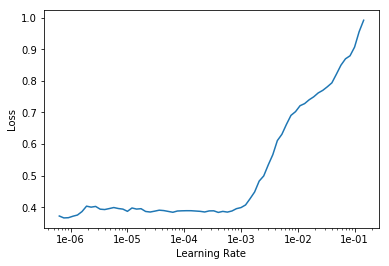

In [52]:
learn1.unfreeze()
learn1.lr_find()
learn1.recorder.plot()

In [53]:
learn1.fit_one_cycle(15, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.415890,0.801329,0.345029,0.654971,00:20
2,0.389199,0.781426,0.333333,0.666667,00:21
3,0.384602,0.774937,0.315789,0.684211,00:21
4,0.374012,0.782668,0.321637,0.678363,00:21
5,0.342604,0.790057,0.292398,0.707602,00:21
6,0.318446,0.783524,0.286550,0.713450,00:21
7,0.301242,0.731268,0.292398,0.707602,00:21
8,0.281163,0.689632,0.239766,0.760234,00:21
9,0.252038,0.716493,0.233918,0.766082,00:21
10,0.236360,0.721113,0.257310,0.742690,00:21


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


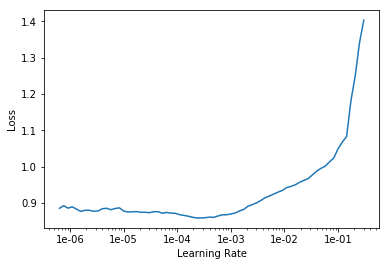

In [25]:
learn1.unfreeze()
learn1.lr_find()
learn1.recorder.plot()

In [26]:
learn1.fit_one_cycle(8, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.869083,0.717781,0.263158,0.736842,00:14
2,0.868051,0.690862,0.269006,0.730994,00:14
3,0.859038,0.687966,0.251462,0.748538,00:14
4,0.860072,0.681888,0.233918,0.766082,00:14
5,0.861017,0.668006,0.245614,0.754386,00:14
6,0.850966,0.670594,0.251462,0.748538,00:15
7,0.840074,0.665701,0.245614,0.754386,00:14
8,0.838214,0.666465,0.239766,0.760234,00:14


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


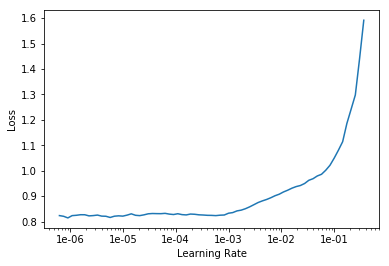

In [27]:
learn1.unfreeze()
learn1.lr_find()
learn1.recorder.plot()

In [28]:
learn1.fit_one_cycle(8, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.816565,0.668529,0.251462,0.748538,00:14
2,0.820718,0.667107,0.257310,0.742690,00:14
3,0.829653,0.666304,0.251462,0.748538,00:14
4,0.825467,0.666423,0.257310,0.742690,00:15
5,0.822641,0.666920,0.251462,0.748538,00:15
6,0.821080,0.664865,0.251462,0.748538,00:15
7,0.822810,0.663451,0.251462,0.748538,00:14
8,0.820453,0.666418,0.257310,0.742690,00:14


In [29]:
log_preds, y = learn1.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.7661)

In [42]:
preds,y,losses = learn1.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn1, preds, y, losses)

In [43]:
interp.plot_top_losses(9, figsize=(7,7))

TypeError: len() of a 0-d tensor

In [30]:
data2 = ImageDataBunch.from_folder(path/'data2a','training','validation',ds_tfms=tfms, bs=64, size=224).normalize(imagenet_stats)
learn2 = create_cnn(data2, models.resnet101, pretrained=True, metrics=[error_rate, accuracy]).mixup()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/amccarthy13/.torch/models/resnet101-5d3b4d8f.pth
178728960it [00:02, 69448656.59it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


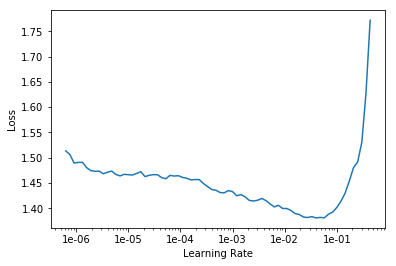

In [31]:
learn2.lr_find()
learn2.recorder.plot()

In [32]:
lr = 4.5e-3
learn2.fit_one_cycle(8, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,1.340012,0.972335,0.485380,0.514620,00:07
2,1.286982,1.172025,0.456140,0.543860,00:06
3,1.226996,0.965881,0.467836,0.532164,00:06
4,1.144323,0.812323,0.333333,0.666667,00:06
5,1.089517,0.846551,0.380117,0.619883,00:06
6,1.045048,0.876330,0.380117,0.619883,00:06
7,1.016131,0.843155,0.368421,0.631579,00:06
8,0.992803,0.833750,0.362573,0.637427,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


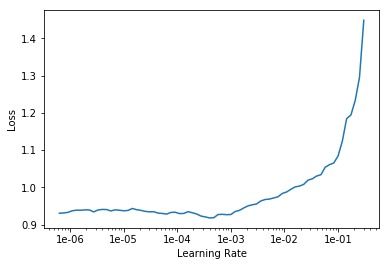

In [33]:
learn2.unfreeze()
learn2.lr_find()
learn2.recorder.plot()

In [34]:
learn2.fit_one_cycle(8, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.931093,0.792500,0.356725,0.643275,00:08
2,0.919052,0.857502,0.327485,0.672515,00:08
3,0.929948,0.991030,0.374269,0.625731,00:08
4,0.917049,0.802236,0.356725,0.643275,00:08
5,0.883850,0.709045,0.298246,0.701754,00:08
6,0.858908,0.575651,0.198830,0.801170,00:08
7,0.834794,0.571986,0.187135,0.812865,00:08
8,0.816664,0.565782,0.192982,0.807018,00:08


In [35]:
learn2.fit_one_cycle(6, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.762846,0.568315,0.192982,0.807018,00:08
2,0.756296,0.561773,0.192982,0.807018,00:08
3,0.746933,0.563672,0.181287,0.818713,00:08
4,0.748162,0.559861,0.187135,0.812865,00:08
5,0.751163,0.564302,0.181287,0.818713,00:08
6,0.744830,0.562268,0.181287,0.818713,00:08


In [45]:
log_preds, y = learn2.TTA()
prob = np.exp(log_preds)
accuracy(log_preds, y)

tensor(0.7661)

In [50]:
data3 = ImageDataBunch.from_folder(path/'data2a','training','validation',ds_tfms=tfms, bs=64, size=762).normalize(imagenet_stats)

In [51]:
learn3 = create_cnn(data3, models.resnet18, pretrained=True, metrics=[error_rate, accuracy])
learn3.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


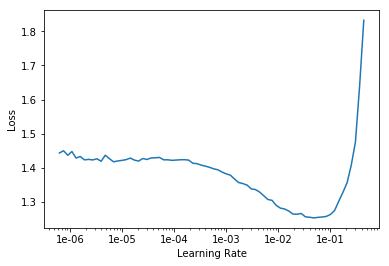

In [52]:
learn3.lr_find()
learn3.recorder.plot()

In [53]:
lr = 6.5e-3
learn2.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.155774,1.026126,0.263158,0.736842,00:06
2,0.281606,2.250251,0.444444,0.555556,00:06
3,0.550733,3.230955,0.637427,0.362573,00:06
4,0.590965,0.807783,0.298246,0.701754,00:06
5,0.551719,1.018635,0.362573,0.637427,00:06
6,0.482721,0.711658,0.280702,0.719298,00:06
7,0.408936,0.989989,0.263158,0.736842,00:06
8,0.349947,0.742374,0.239766,0.760234,00:06
9,0.283902,0.734766,0.257310,0.742690,00:06
10,0.232200,0.711894,0.245614,0.754386,00:06


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


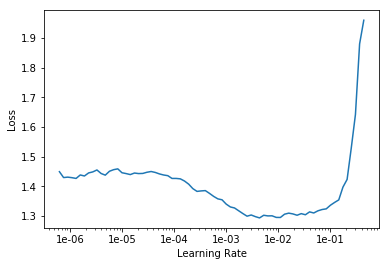

In [54]:
learn3.unfreeze()
learn3.lr_find()
learn3.recorder.plot()

In [59]:
learn3.fit_one_cycle(9, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,accuracy,time
1,0.415056,0.789400,0.315789,0.684211,00:25
2,0.400462,0.874306,0.304094,0.695906,00:25
3,0.376431,0.995398,0.280702,0.719298,00:24
4,0.374492,1.556420,0.438596,0.561404,00:24
5,0.353487,1.080855,0.315789,0.684211,00:24
6,0.311947,0.895419,0.304094,0.695906,00:25
7,0.272735,0.901596,0.251462,0.748538,00:24
8,0.234285,0.872280,0.239766,0.760234,00:24
9,0.205227,0.858884,0.251462,0.748538,00:25
